# Multiple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
import os

source = 'https://www.kaggle.com/antfarol/car-sale-advertisements/download'

link = os.path.expanduser("~/Downloads/car_ad.csv")
print(link)
df = pd.read_csv(link, encoding="latin1")
df.head(10)

/Users/artyomkolas/Downloads/car_ad.csv


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [3]:
df.shape


(9576, 10)

In [4]:
df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [5]:
df.describe(include = "all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [6]:
df.replace("?", np.nan, inplace = True)
df.head(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear


In [7]:
missing_data = df.isnull() # True - null data (NaN, 0)
missing_data.head(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

car
False    9576
Name: car, dtype: int64

price
False    9576
Name: price, dtype: int64

body
False    9576
Name: body, dtype: int64

mileage
False    9576
Name: mileage, dtype: int64

engV
False    9142
True      434
Name: engV, dtype: int64

engType
False    9576
Name: engType, dtype: int64

registration
False    9576
Name: registration, dtype: int64

year
False    9576
Name: year, dtype: int64

model
False    9576
Name: model, dtype: int64

drive
False    9065
True      511
Name: drive, dtype: int64



In [9]:
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [10]:
features = ['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive']

In [11]:
for el in features:
    print(f'=============================== {el} =============================')
    print(df[el].value_counts(dropna=False))

=============================== car =============================
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
Samsung            1
Wartburg           1
Maserati           1
Barkas             1
Aro                1
Name: car, Length: 87, dtype: int64
=============================== price =============================
0.00000        267
8500.00000      92
6500.00000      86
7500.00000      85
10500.00000     83
              ... 
26220.28500      1
67900.00000      1
3333.00000       1
460.00000        1
11280.79875      1
Name: price, Length: 1353, dtype: int64
=============================== body =============================
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64
=============================== mileage =============================
0      348
1      304
200    171
150    131
250    128
      ... 
427      1
840

In [12]:
df['drive'].replace(np.nan, "other", inplace=True)

In [13]:
df[['price']] = df[['price']].astype("int")
print(df['price'].value_counts(dropna=False))

0        267
8500      92
6500      86
7500      85
10500     83
        ... 
6928       1
6880       1
10974      1
2778       1
13972      1
Name: price, Length: 1348, dtype: int64


In [14]:
df.dropna(subset=['engV'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['engV'].value_counts(dropna=False)

2.00     1539
1.60     1229
3.00      703
1.50      692
1.80      585
         ... 
1.36        1
22.00       1
1.79        1
1.35        1
2.28        1
Name: engV, Length: 117, dtype: int64

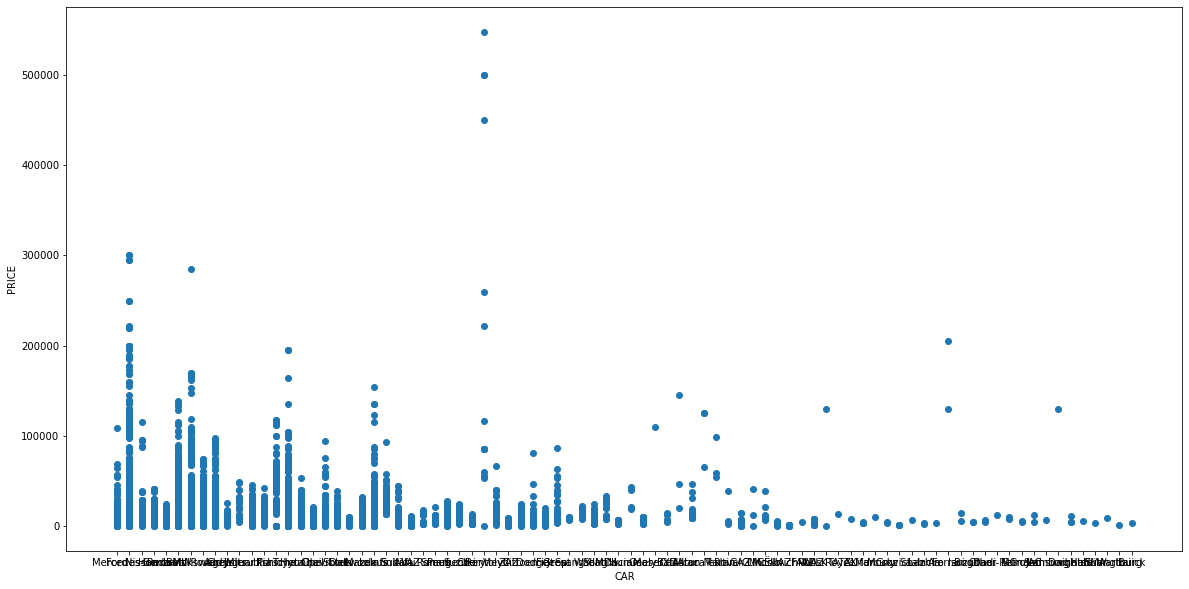

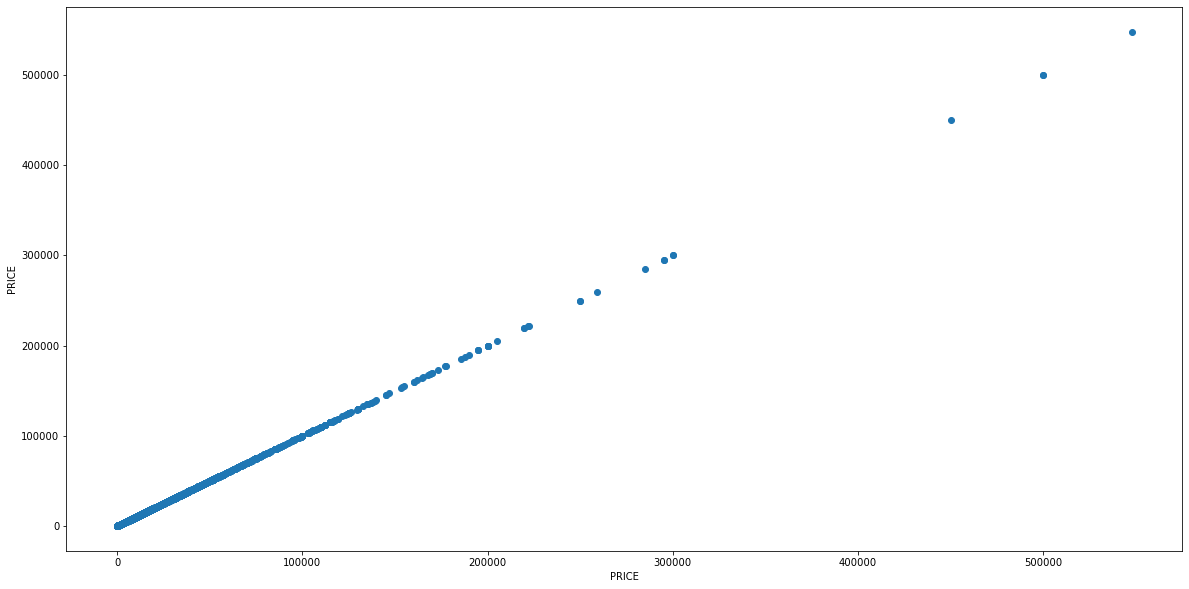

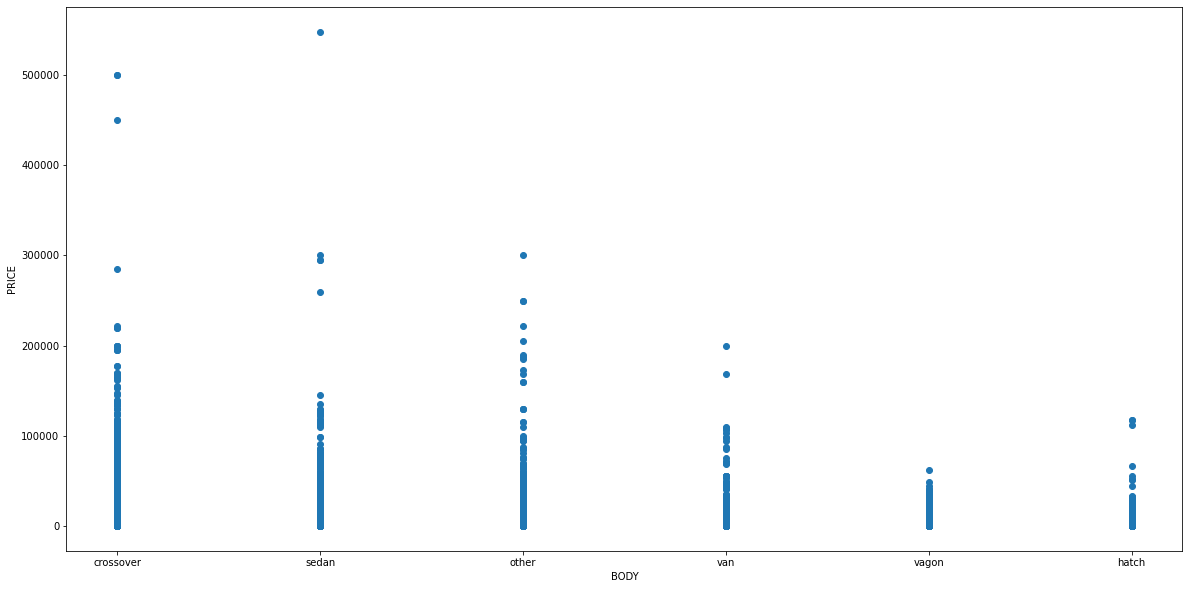

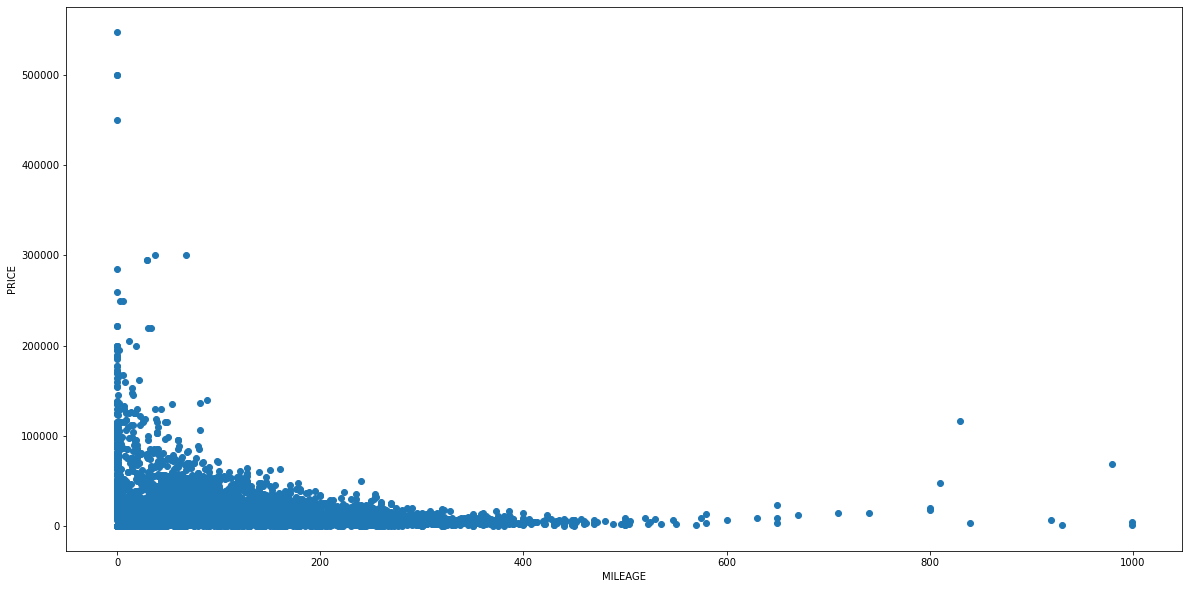

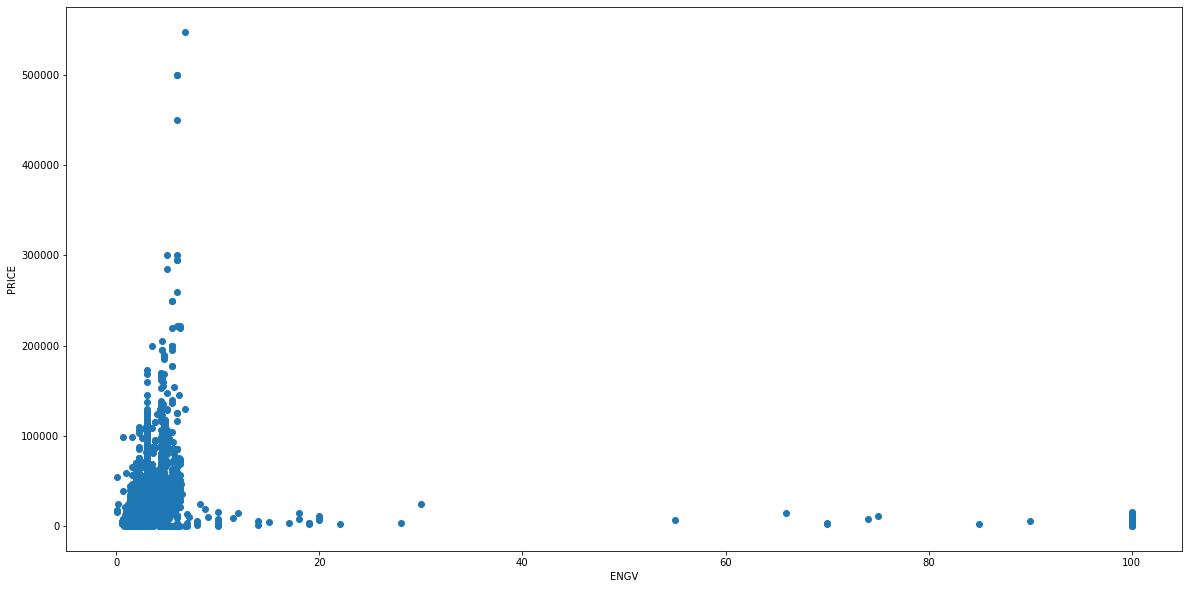

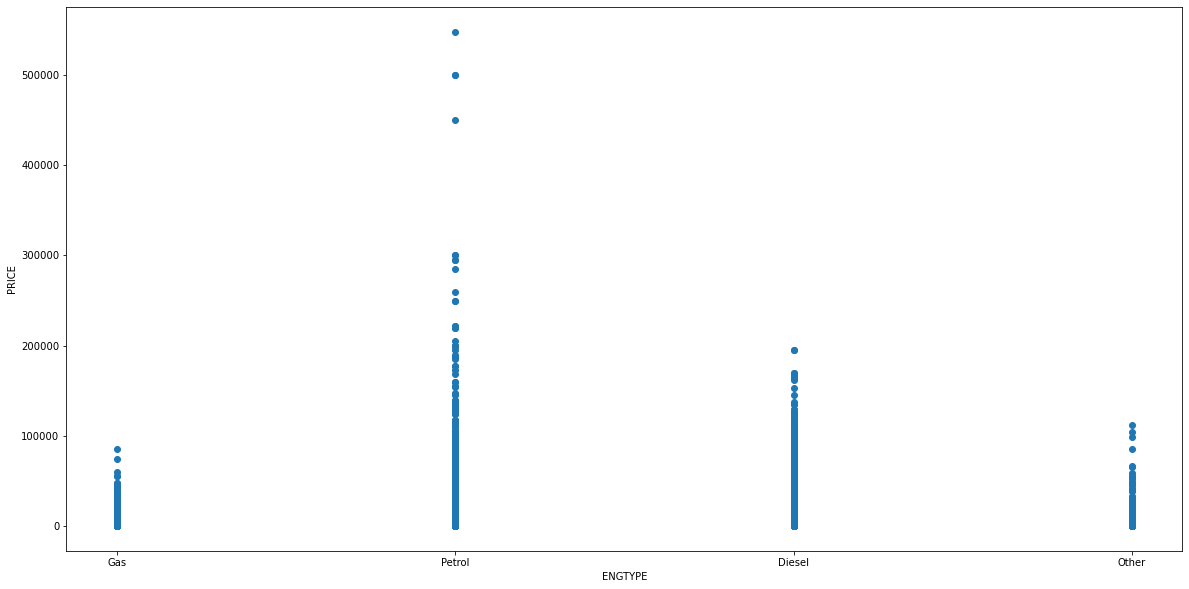

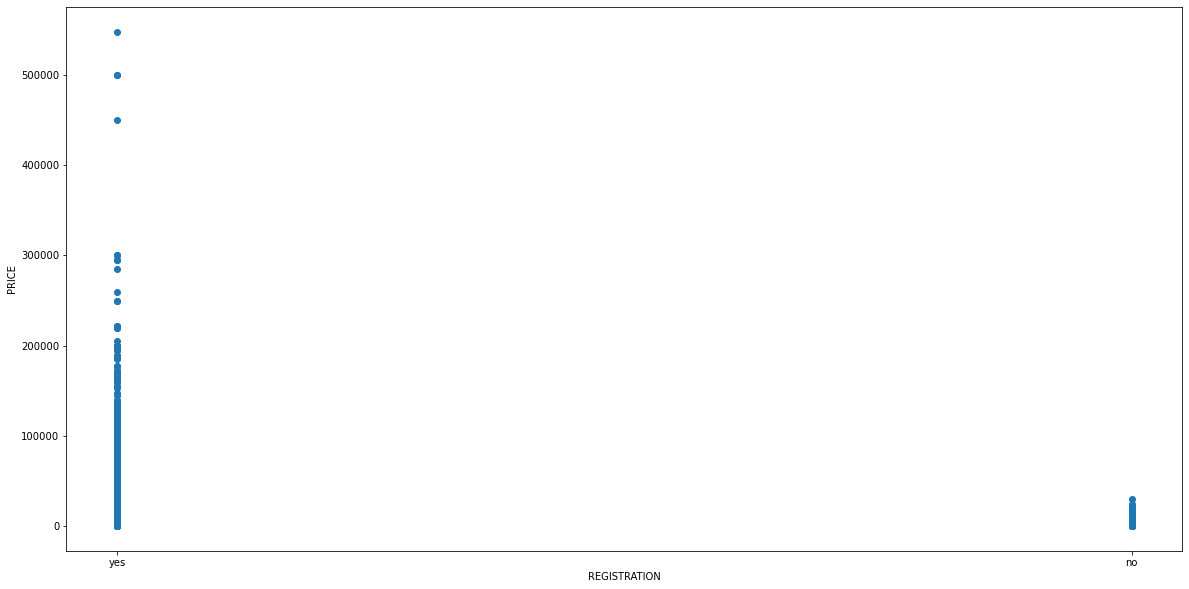

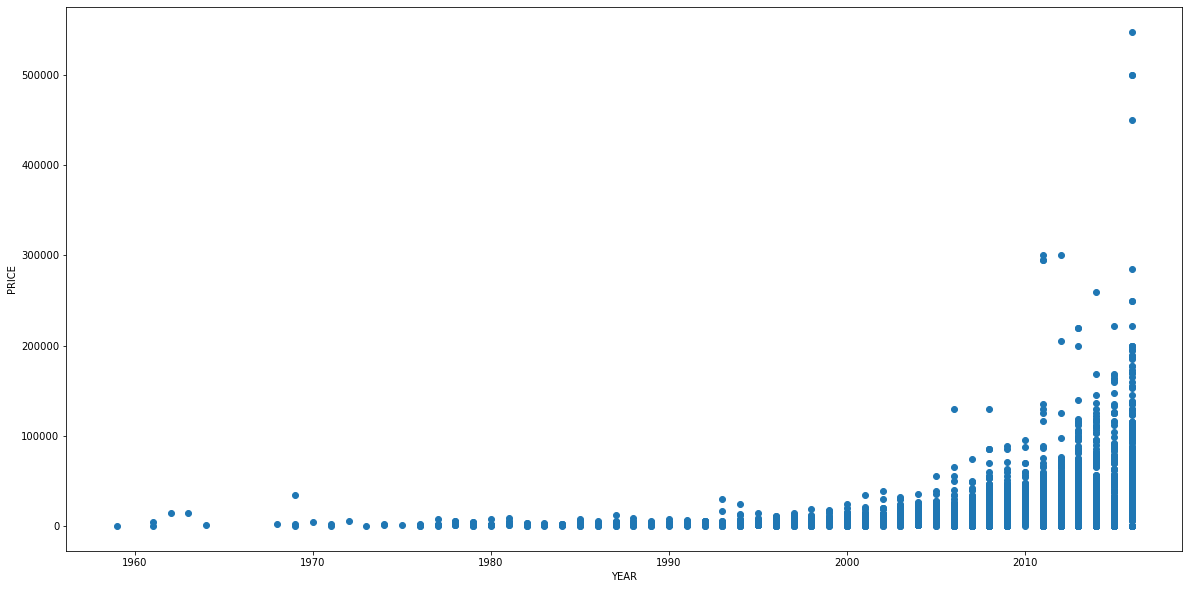

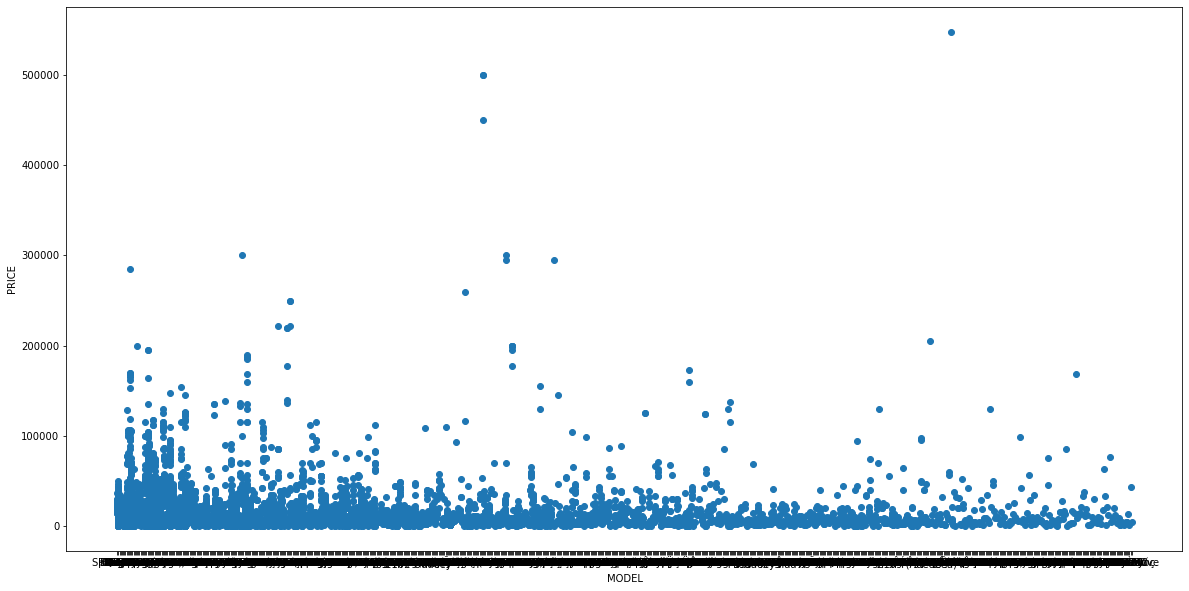

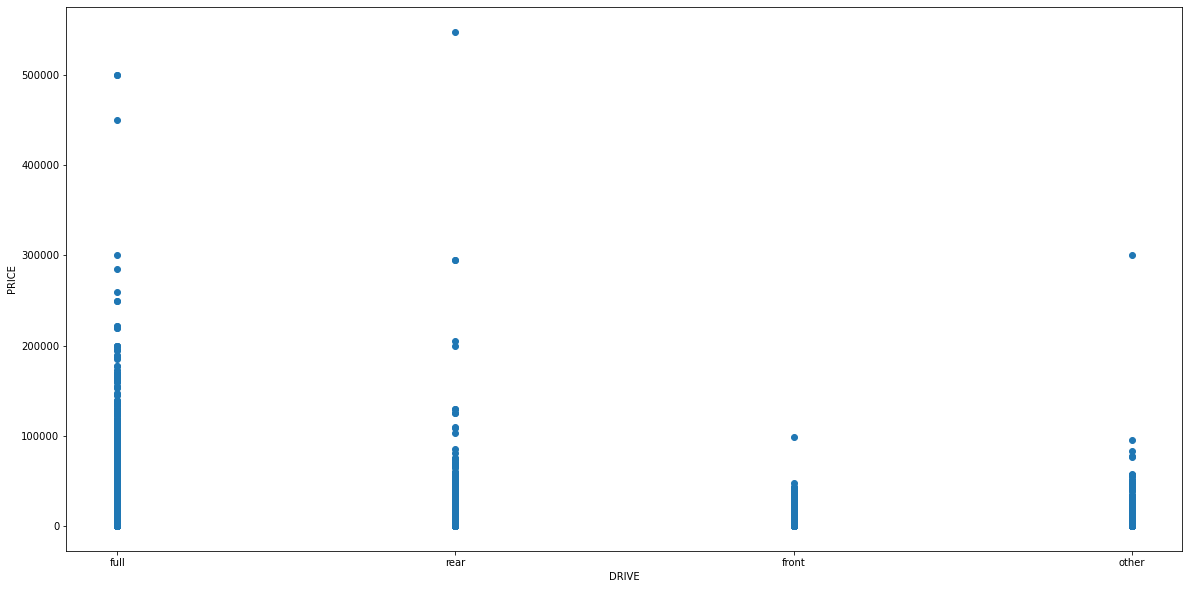

In [15]:
features = ['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive']

for el in features:
    print('')
    label = el
    el = df[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')


In [16]:
df1 = df[['price', 'mileage', 'engV', 'year']]
msk = np.random.rand(len(df)) < 0.8
train = df1[msk]
test = df1[~msk]

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['mileage', 'engV', 'year']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[-40.34006676 353.55974751 987.71085138]]


In [18]:
y_hat= regr.predict(test[['mileage', 'engV', 'year']])
x = np.asanyarray(test[['mileage', 'engV', 'year']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 461888724.99
Variance score: 0.18


In [19]:
df1.shape

(9142, 4)

In [20]:
df2 = df1[['price', 'mileage', 'engV', 'year']]

In [21]:
features = ['price', 'mileage', 'engV', 'year']
for el in features:
    print(f'=============================== {el} =============================')
    print(df2[el].value_counts(dropna=False))

=============================== price =============================
0         258
8500       90
7500       82
6500       80
10500      80
         ... 
45600       1
20833       1
35162       1
285000      1
6199        1
Name: price, Length: 1302, dtype: int64
=============================== mileage =============================
0      329
1      284
200    168
150    124
250    123
      ... 
520      1
600      1
419      1
840      1
435      1
Name: mileage, Length: 438, dtype: int64
=============================== engV =============================
2.00     1539
1.60     1229
3.00      703
1.50      692
1.80      585
         ... 
1.36        1
22.00       1
1.79        1
1.35        1
2.28        1
Name: engV, Length: 117, dtype: int64
=============================== year =============================
2008    1116
2007     893
2012     737
2011     688
2013     599
2006     546
2016     441
2005     387
2010     374
2014     336
2009     334
2004     326
2003     269
2000     22

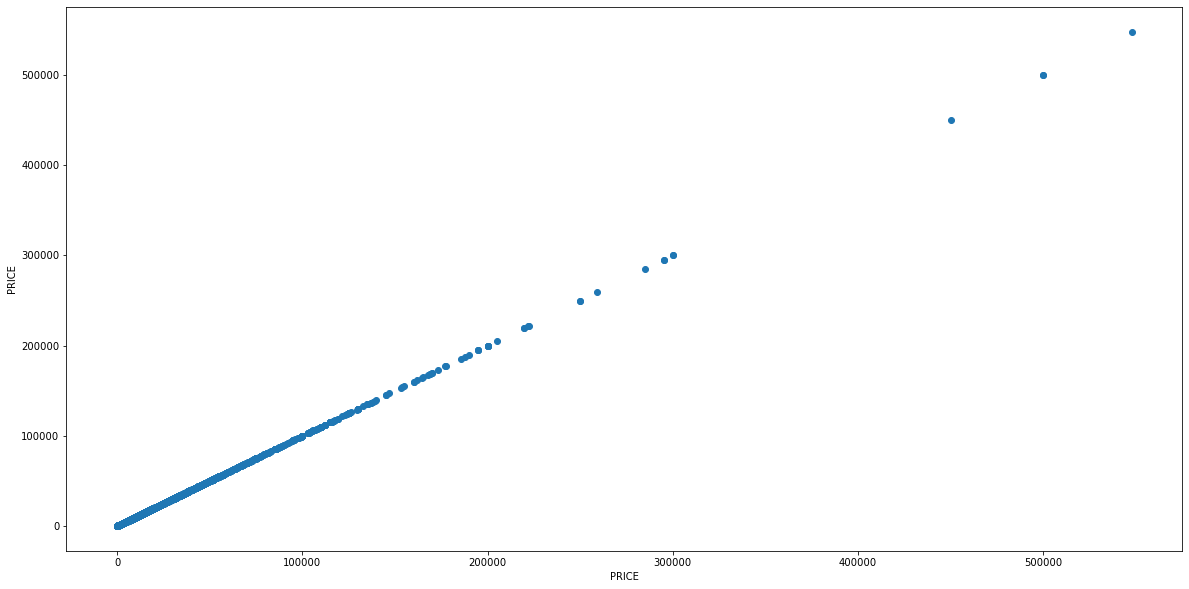

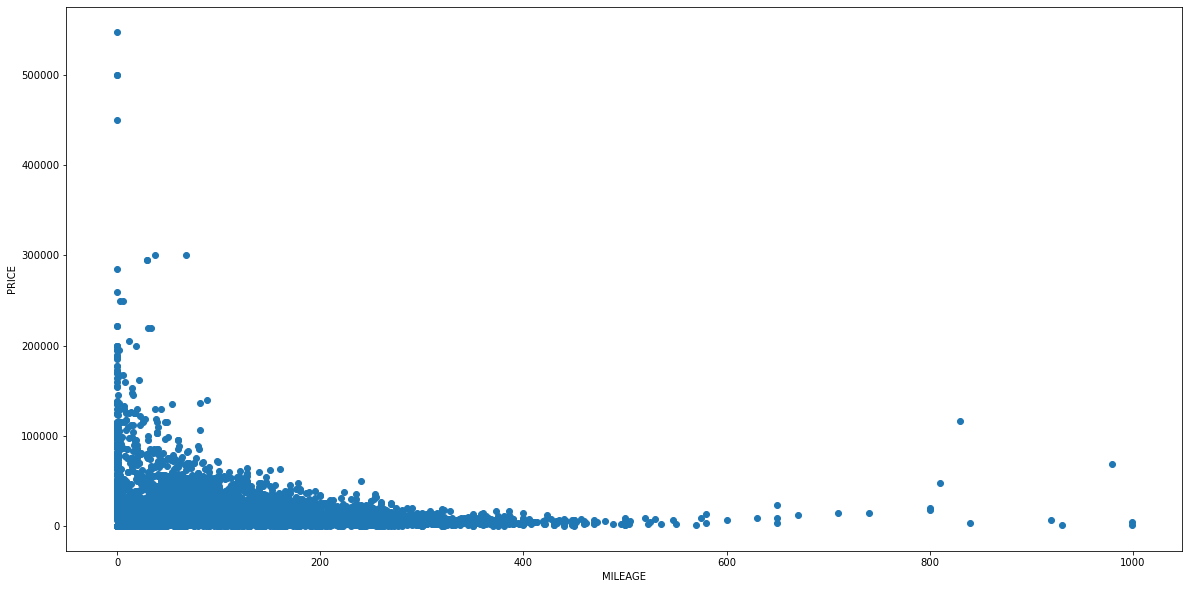

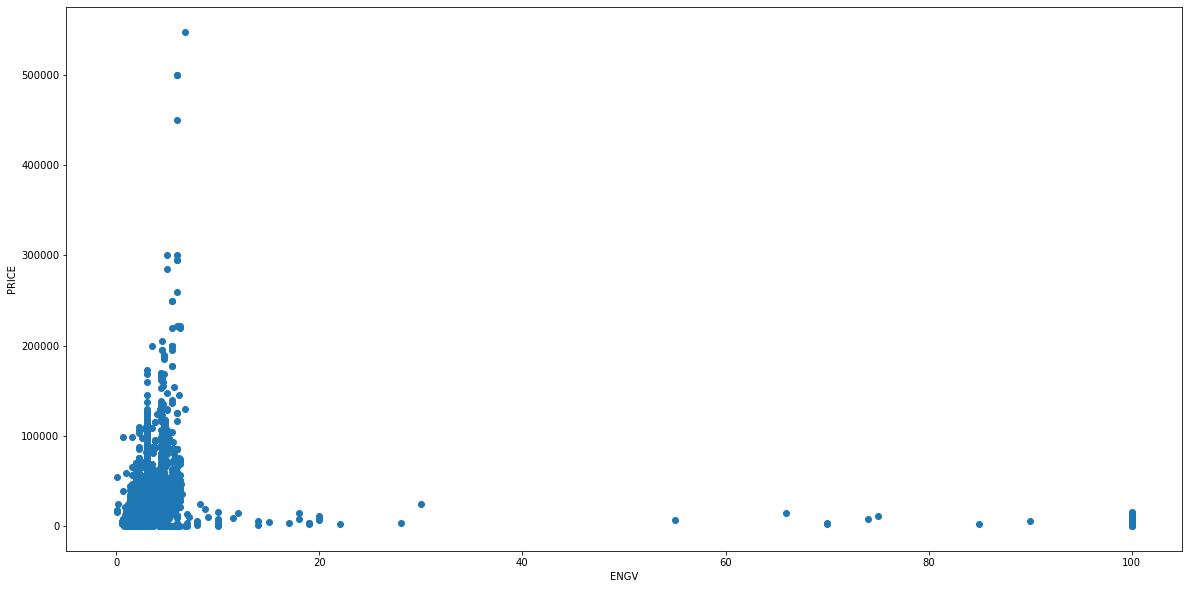

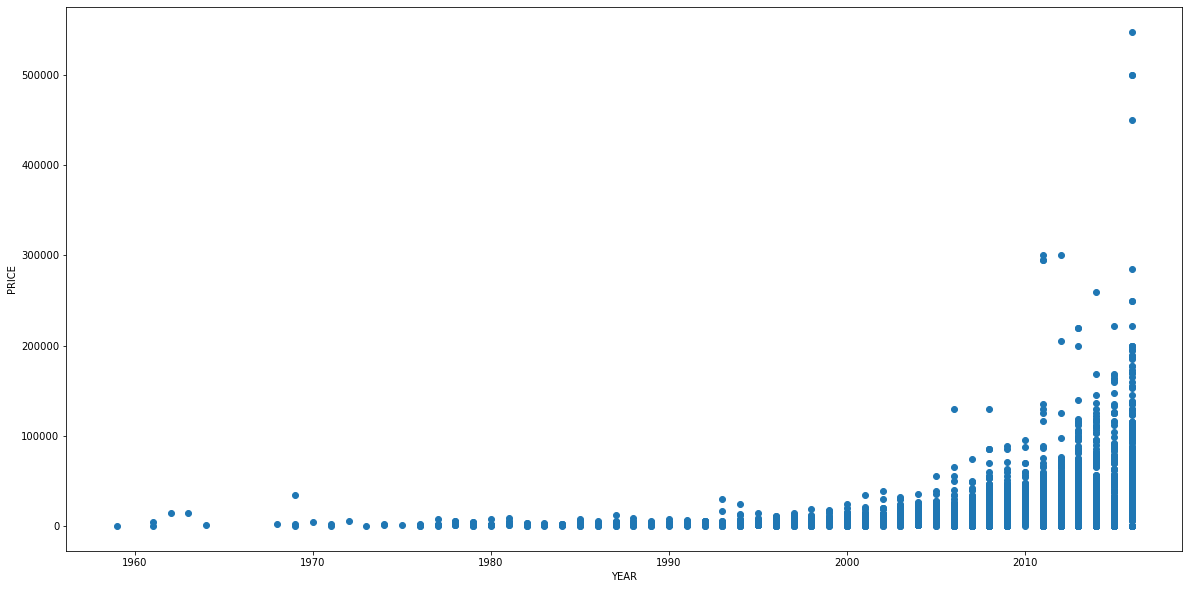

In [22]:
features = ['price', 'mileage', 'engV', 'year']

for el in features:
    print('')
    label = el
    el = df2[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df2.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')

In [23]:
df2 = df2.loc[df2['price'] != 0] 
df2.reset_index(drop=True, inplace=True)
df2['price'].value_counts(dropna=False)

8500     90
7500     82
6500     80
10500    80
3500     76
         ..
28777     1
23880     1
50499     1
13621     1
407       1
Name: price, Length: 1301, dtype: int64

In [24]:
df2.shape

(8884, 4)

In [25]:
df2 = df2.loc[df2['price'] < 200000] 
df2.reset_index(drop=True, inplace=True)
df2['price'].value_counts(dropna=False)

8500      90
7500      82
10500     80
6500      80
3500      76
          ..
35162      1
35138      1
45600      1
10550      1
123000     1
Name: price, Length: 1287, dtype: int64

In [26]:
df2.shape

(8866, 4)

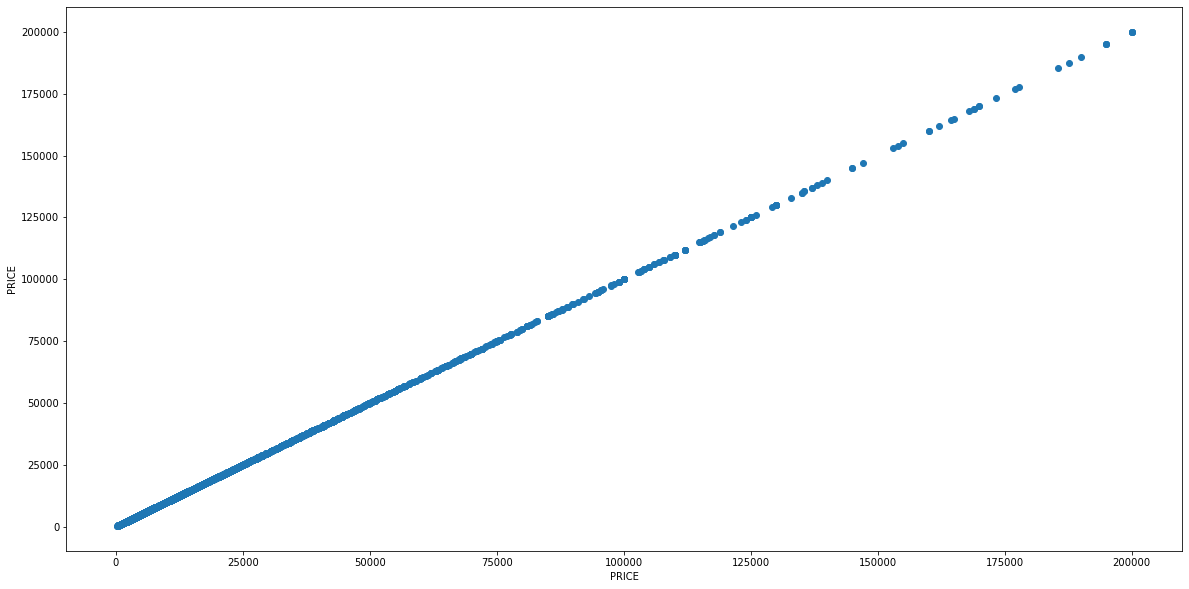

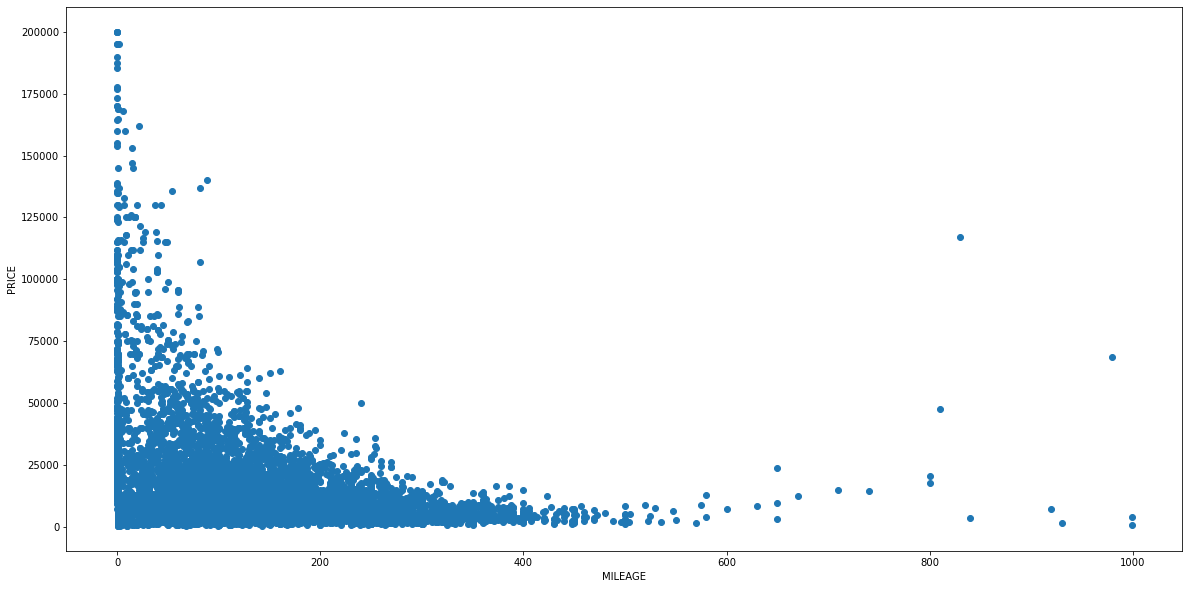

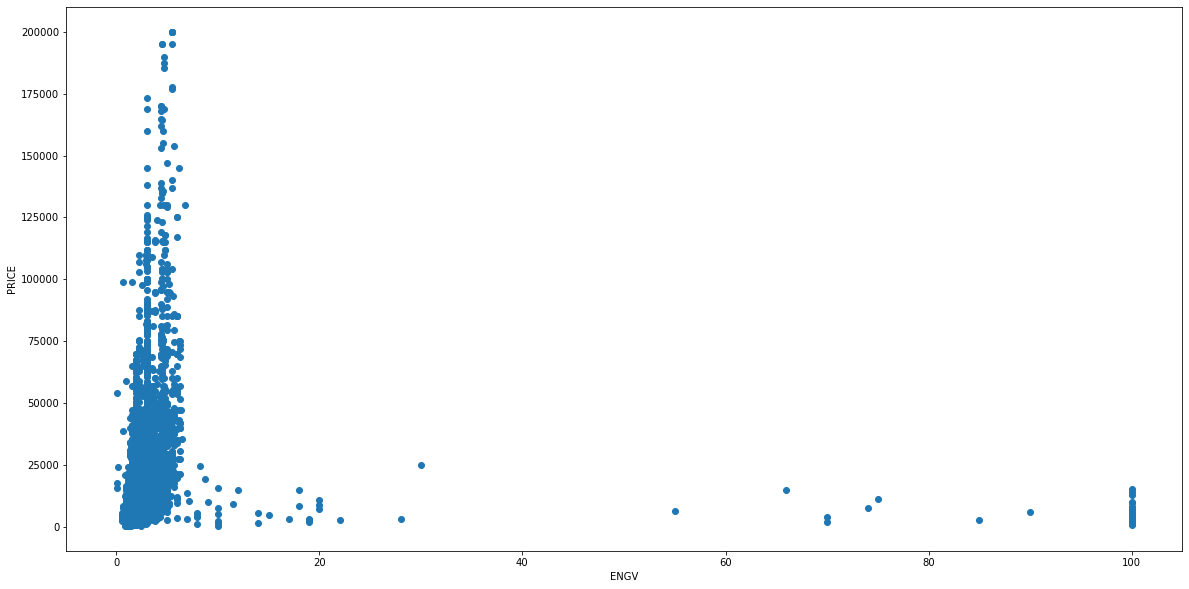

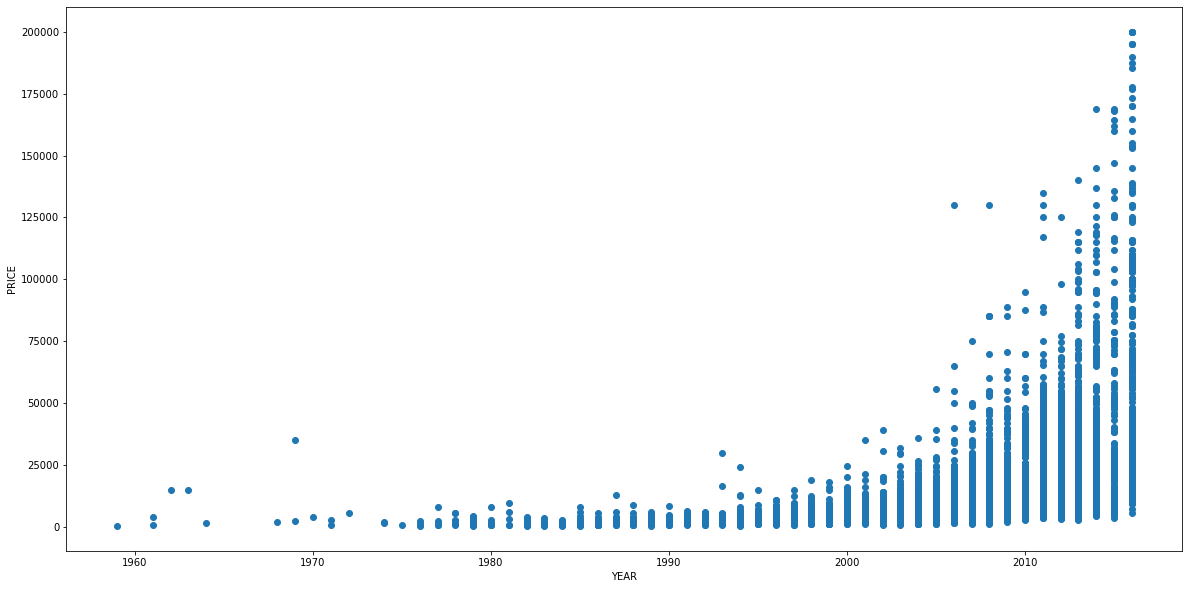

In [27]:
features = ['price', 'mileage', 'engV', 'year']

for el in features:
    print('')
    label = el
    el = df2[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df2.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')

In [28]:
df2.shape

(8866, 4)

In [29]:
df2 = df2.loc[df2['engV'] > 0.5] 
df2.reset_index(drop=True, inplace=True)
df2['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.36       1
1.79       1
6.40       1
1.35       1
2.28       1
Name: engV, Length: 113, dtype: int64

In [30]:
df2.shape

(8862, 4)

In [31]:
df2 = df2.loc[df2['engV'] < 10] 
df2.reset_index(drop=True, inplace=True)
df2['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.24       1
1.79       1
9.00       1
1.35       1
2.28       1
Name: engV, Length: 93, dtype: int64

In [32]:
df2.shape

(8804, 4)

In [33]:
df2 = df2.loc[df2['year'] > 1980] 
df2.reset_index(drop=True, inplace=True)
df2['year'].value_counts(dropna=False)

2008    1096
2007     869
2012     714
2011     666
2013     574
2006     536
2005     380
2010     372
2016     368
2009     326
2004     323
2014     310
2003     264
2000     213
2002     210
2001     197
2015     197
1999     149
1998     140
1997     113
1996     111
1995      84
1994      73
1991      64
1992      60
1990      58
1988      56
1993      50
1989      46
1986      41
1987      39
1985      21
1984      15
1982      10
1983       7
1981       5
Name: year, dtype: int64

In [34]:
df2.shape

(8757, 4)

In [35]:
df2 = df2.loc[df2['mileage'] > 1] 
df2.reset_index(drop=True, inplace=True)
df2['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
180    114
160    114
      ... 
520      1
600      1
427      1
840      1
547      1
Name: mileage, Length: 435, dtype: int64

In [36]:
df2.shape

(8236, 4)

In [37]:
df2 = df2.loc[df2['mileage'] < 400] 
df2.reset_index(drop=True, inplace=True)
df2['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
160    114
180    114
      ... 
392      1
384      1
356      1
336      1
389      1
Name: mileage, Length: 377, dtype: int64

In [38]:
df2.shape

(8110, 4)

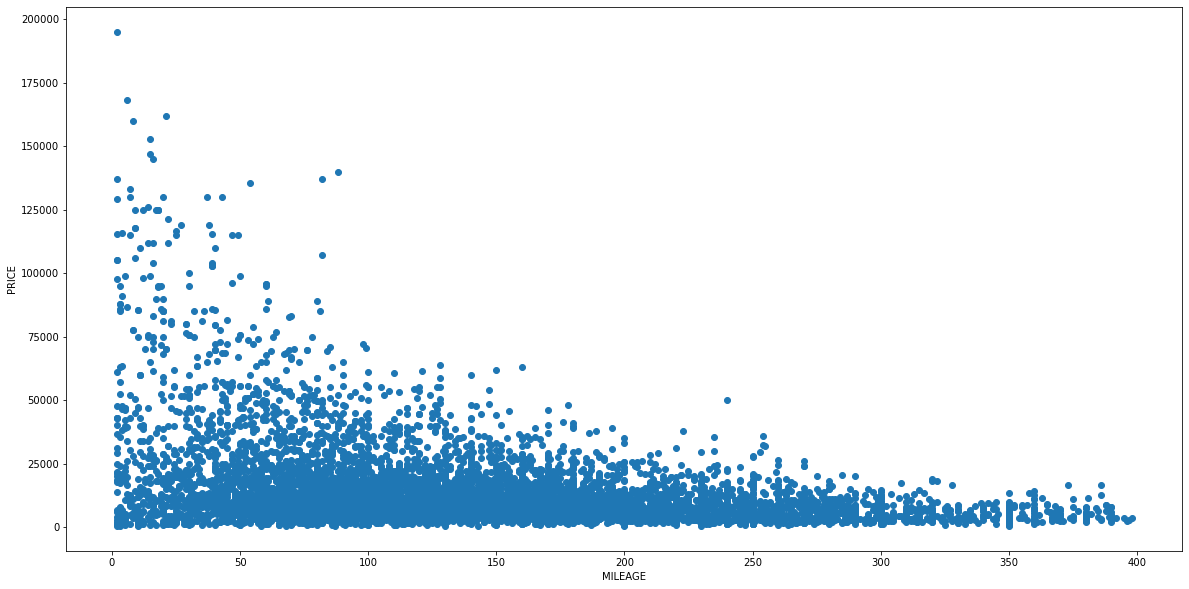

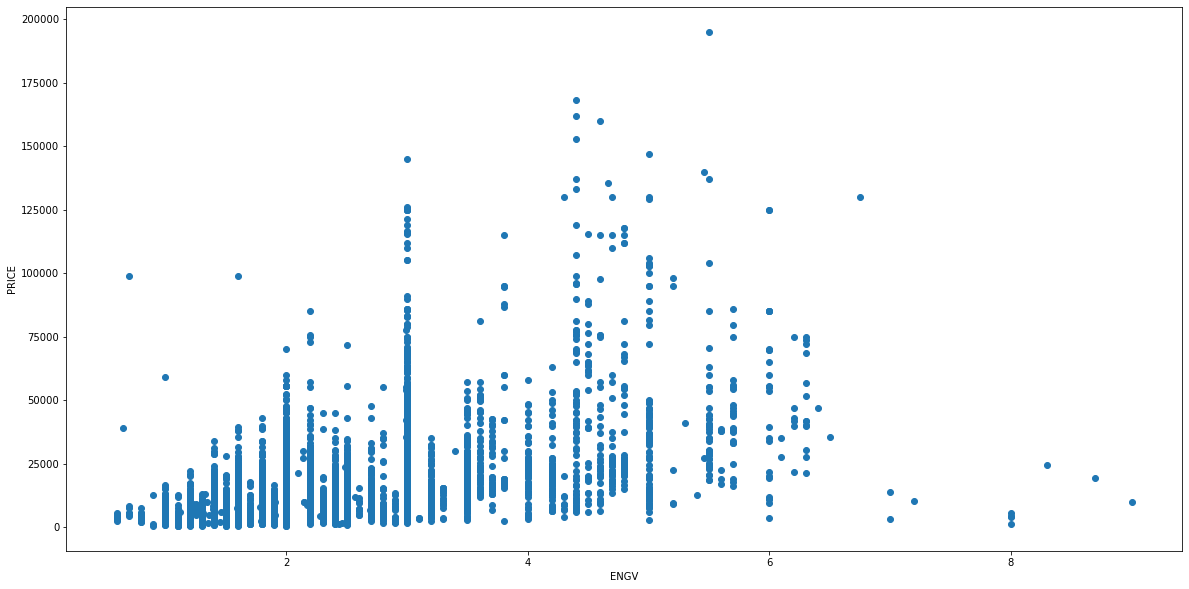

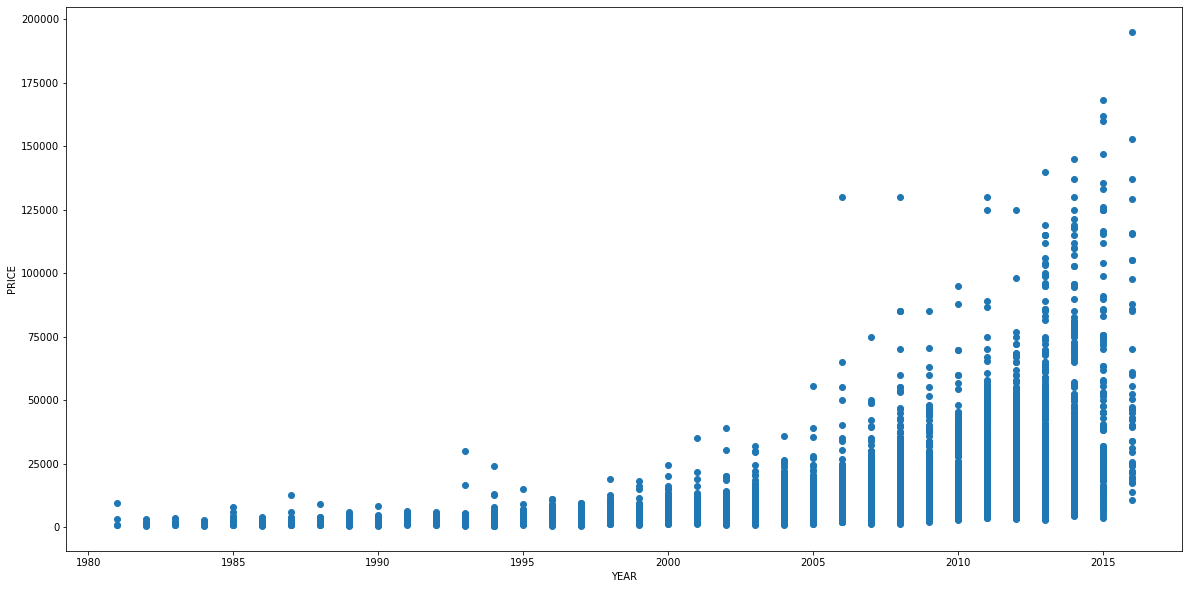

In [39]:
features = ['mileage', 'engV', 'year']

for el in features:
    print('')
    label = el
    el = df2[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df2.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')

In [40]:
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

In [41]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['mileage', 'engV', 'year']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -44.44609331 8928.94445118  761.04146555]]


In [42]:
y_hat= regr.predict(test[['mileage', 'engV', 'year']])
x = np.asanyarray(test[['mileage', 'engV', 'year']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 142620809.67
Variance score: 0.49


# drop ['engV']

In [43]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['mileage', 'year']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[-34.53256138 886.36152791]]


In [44]:
y_hat= regr.predict(test[['mileage', 'year']])
x = np.asanyarray(test[['mileage', 'year']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 218858379.78
Variance score: 0.21


# NON LINEAR REGRESSION

# [NICE guide !!!](https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn) <-- link

In [45]:
df2 = df2[['price', 'engV', 'year', 'mileage']]

In [46]:
df2.describe()

,price,engV,year,mileage
count,8110.000000,8110.000000,8110.000000,8110.000000
mean,13943.037608,2.226678,2006.475216,145.258940
std,15881.944895,0.964966,6.118738,81.765895
min,370.000000,0.600000,1981.000000,2.000000
25%,5500.000000,1.600000,2004.000000,84.000000
50%,9300.000000,2.000000,2008.000000,135.000000
75%,15900.000000,2.500000,2011.000000,198.000000
max,195000.000000,9.000000,2016.000000,398.000000


### normalization

In [47]:
target_column = ['price'] 
predictors = list(set(list(df2.columns))-set(target_column))
df2[predictors] = df2[predictors]/df2[predictors].max()
df2.describe()

,price,engV,year,mileage
count,8110.000000,8110.000000,8110.000000,8110.000000
mean,13943.037608,0.247409,0.995275,0.364972
std,15881.944895,0.107218,0.003035,0.205442
min,370.000000,0.066667,0.982639,0.005025
25%,5500.000000,0.177778,0.994048,0.211055
50%,9300.000000,0.222222,0.996032,0.339196
75%,15900.000000,0.277778,0.997520,0.497487
max,195000.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.model_selection import train_test_split
X = df2[predictors].values
y = df2[target_column].values
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(5677, 3)
(2433, 3)


# DecisionTreeRegressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

Once the model is built on the training set, we can make the predictions. The first line of code below predicts on the training set. The second and third lines of code prints the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the fourth to sixth lines.

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Code lines 1 to 3
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

12928.309671895859
0.37339413785788256
11593.022495446361
0.3832070532697507


In [51]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [52]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 

10703.049964652682
0.5705366902166469
9884.584026022729
0.5516028570648784


In [53]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2)) 

6963.026787744462
0.8182363257771048
7391.111253905455
0.7492935423526779


# RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

3065.110458986065
0.9647788752011487
6739.824077788
0.7915301935814832


# With Boosting

# lightgbm

In [55]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train,y_train)

pred_train_rf=lgbm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = lgbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

5375.373391826913
0.8916751152712279
6310.347586847126
0.8172520116495273


/Users/artyomkolas/opt/anaconda3/envs/regr/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# xgboost

In [56]:
import xgboost as xgb

xgbm = xgb.XGBRegressor()
xgbm.fit(X_train, y_train)

pred_train_rf=xgbm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = xgbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

3404.8331843453
0.9565387073492619
6616.231709261999
0.7991057741449498


# catboost

In [57]:
import catboost as ctb

ctbm = ctb.CatBoostRegressor(verbose=False)
ctbm.fit(X_train, y_train)

pred_train_rf=ctbm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = ctbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

4540.5467326277085
0.922709296374122
6507.976453026763
0.8056260826400213


# lightgbm leads with r2_score: 0.8172